# Importing Libraries

In [46]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

## Loading Dataset

In [49]:
import pandas as pd

# Load the dataset
file_path = 'recipe_final (1).csv'
recipe_df = pd.read_csv(file_path)

recipe_df.head()

,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'..."
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl..."
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar..."
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p..."
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he..."


## Preprocess Ingredients

In [74]:
# Preprocess Ingredients
#Term Frequency-Inverse Document Frequency
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['ingredients_list'])

## Converting string into a numerical using Standard Scaler

In [122]:
# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']])


## Implementing KNN model

In [78]:
# Combine Features
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])

# Train KNN Model
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=3)

# Defining function 

In [80]:
# Function to Recommend Recipes
def recommend_recipes(input_features):
    input_features_scaled = scaler.transform([input_features[:7]])
    input_ingredients_transformed = vectorizer.transform([input_features[7]])
    input_combined = np.hstack([input_features_scaled, input_ingredients_transformed.toarray()])
    distances, indices = knn.kneighbors(input_combined)
    recommendations = recipe_df.iloc[indices[0]]
    return recommendations[['recipe_name', 'ingredients_list', 'image_url']]


## Example input for testing the model and function

In [82]:
# Example Input
input_features = [15, 36, 1, 42, 21, 81, 2, 'pork belly, smoked paprika, kosher salt']
recommendations = recommend_recipes(input_features)
recommendations

E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,recipe_name,ingredients_list,image_url
0,Homemade Bacon,"['pork belly', 'smoked paprika', 'kosher salt'...",https://images.media-allrecipes.com/userphotos...
3507,Char Siu (Chinese Barbeque Pork),"['honey', 'Shaoxing cooking wine', 'hoisin sau...",https://images.media-allrecipes.com/userphotos...
1926,Adobo Twist,"['vegetable oil', 'onion', 'head garlic', 'por...",https://images.media-allrecipes.com/userphotos...


# Histogram Graph

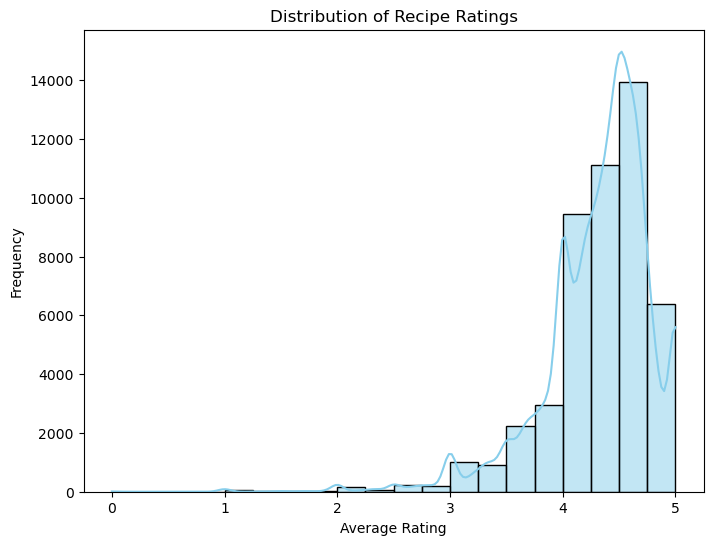

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of average ratings
plt.figure(figsize=(8, 6))
sns.histplot(recipe_df['aver_rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


### most used ingredient via bar graph

C:\Users\Neha\AppData\Local\Temp\ipykernel_13932\1052224252.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ingredient_freqs), y=list(ingredient_names), palette='coolwarm')


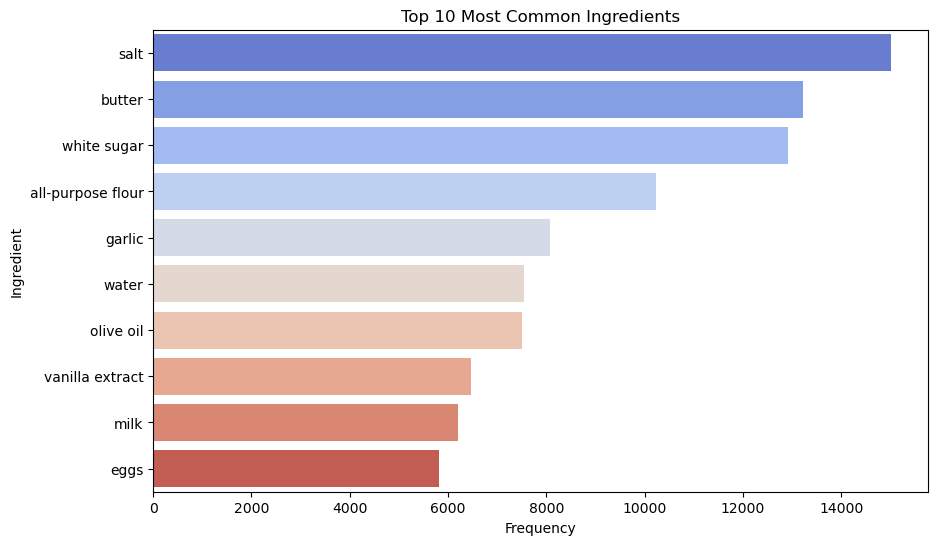

In [86]:
#Recipe Review Count
##Top Ingredients
from collections import Counter
from itertools import chain

# Extract all ingredients and flatten the list
all_ingredients = recipe_df['ingredients_list'].apply(lambda x: eval(x))
flat_ingredients = list(chain.from_iterable(all_ingredients))

# Count the most common ingredients
ingredient_counts = Counter(flat_ingredients).most_common(10)
ingredient_names, ingredient_freqs = zip(*ingredient_counts)

# Plotting the top 10 ingredients
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ingredient_freqs), y=list(ingredient_names), palette='coolwarm')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()


## Top 10 most used recipes via graph

C:\Users\Neha\AppData\Local\Temp\ipykernel_13932\680644988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_nums', y='recipe_name', data=top_reviews, palette='viridis')


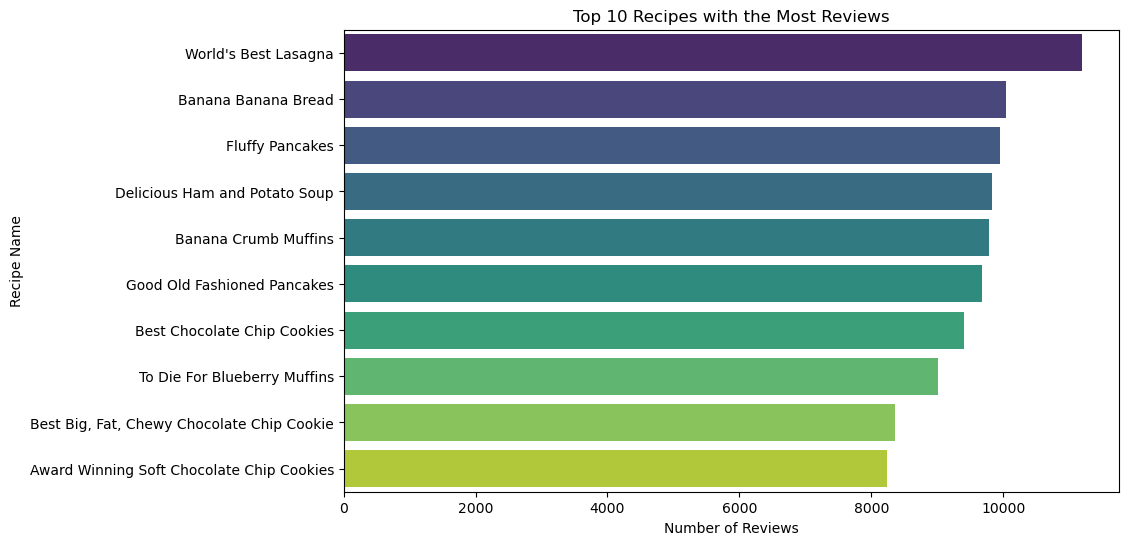

In [88]:
# Bar chart of the top 10 recipes with the most reviews
top_reviews = recipe_df.nlargest(10, 'review_nums')

plt.figure(figsize=(10, 6))
sns.barplot(x='review_nums', y='recipe_name', data=top_reviews, palette='viridis')
plt.title('Top 10 Recipes with the Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Recipe Name')
plt.show()


## Box Plot for calorie

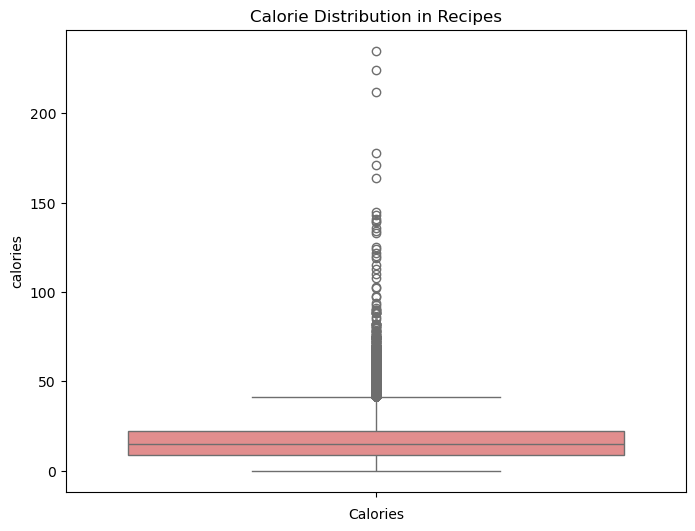

In [90]:
#Calorie Distribution
# Boxplot for the distribution of calories in recipes
plt.figure(figsize=(8, 6))
sns.boxplot(recipe_df['calories'], color='lightcoral')
plt.title('Calorie Distribution in Recipes')
plt.xlabel('Calories')
plt.show()


## Pie chart for average fat,carbs and protien

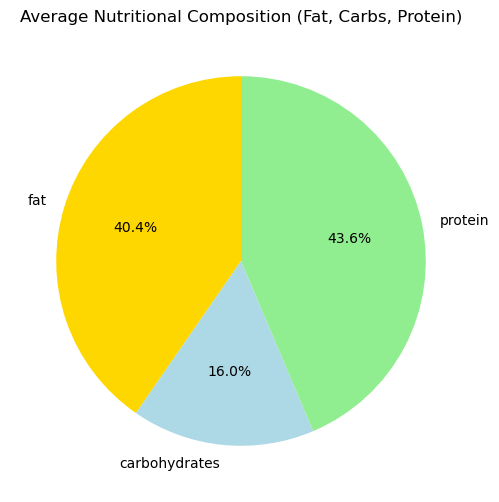

In [107]:
#Nutritional Content Breakdown
# Pie chart for average nutritional composition
nutrition_data = recipe_df[['fat', 'carbohydrates', 'protein']].mean()

plt.figure(figsize=(6, 6))
plt.pie(nutrition_data, labels=nutrition_data.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Average Nutritional Composition (Fat, Carbs, Protein)')
plt.show()
